In [7]:
import pandas as pd
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [11]:
# CODE TO VISUALIZE FROM SEABORN

import numpy as np

df['Outcome'] = np.where(df['Outcome']==1 , "Diabetic", "Non Diabetic")

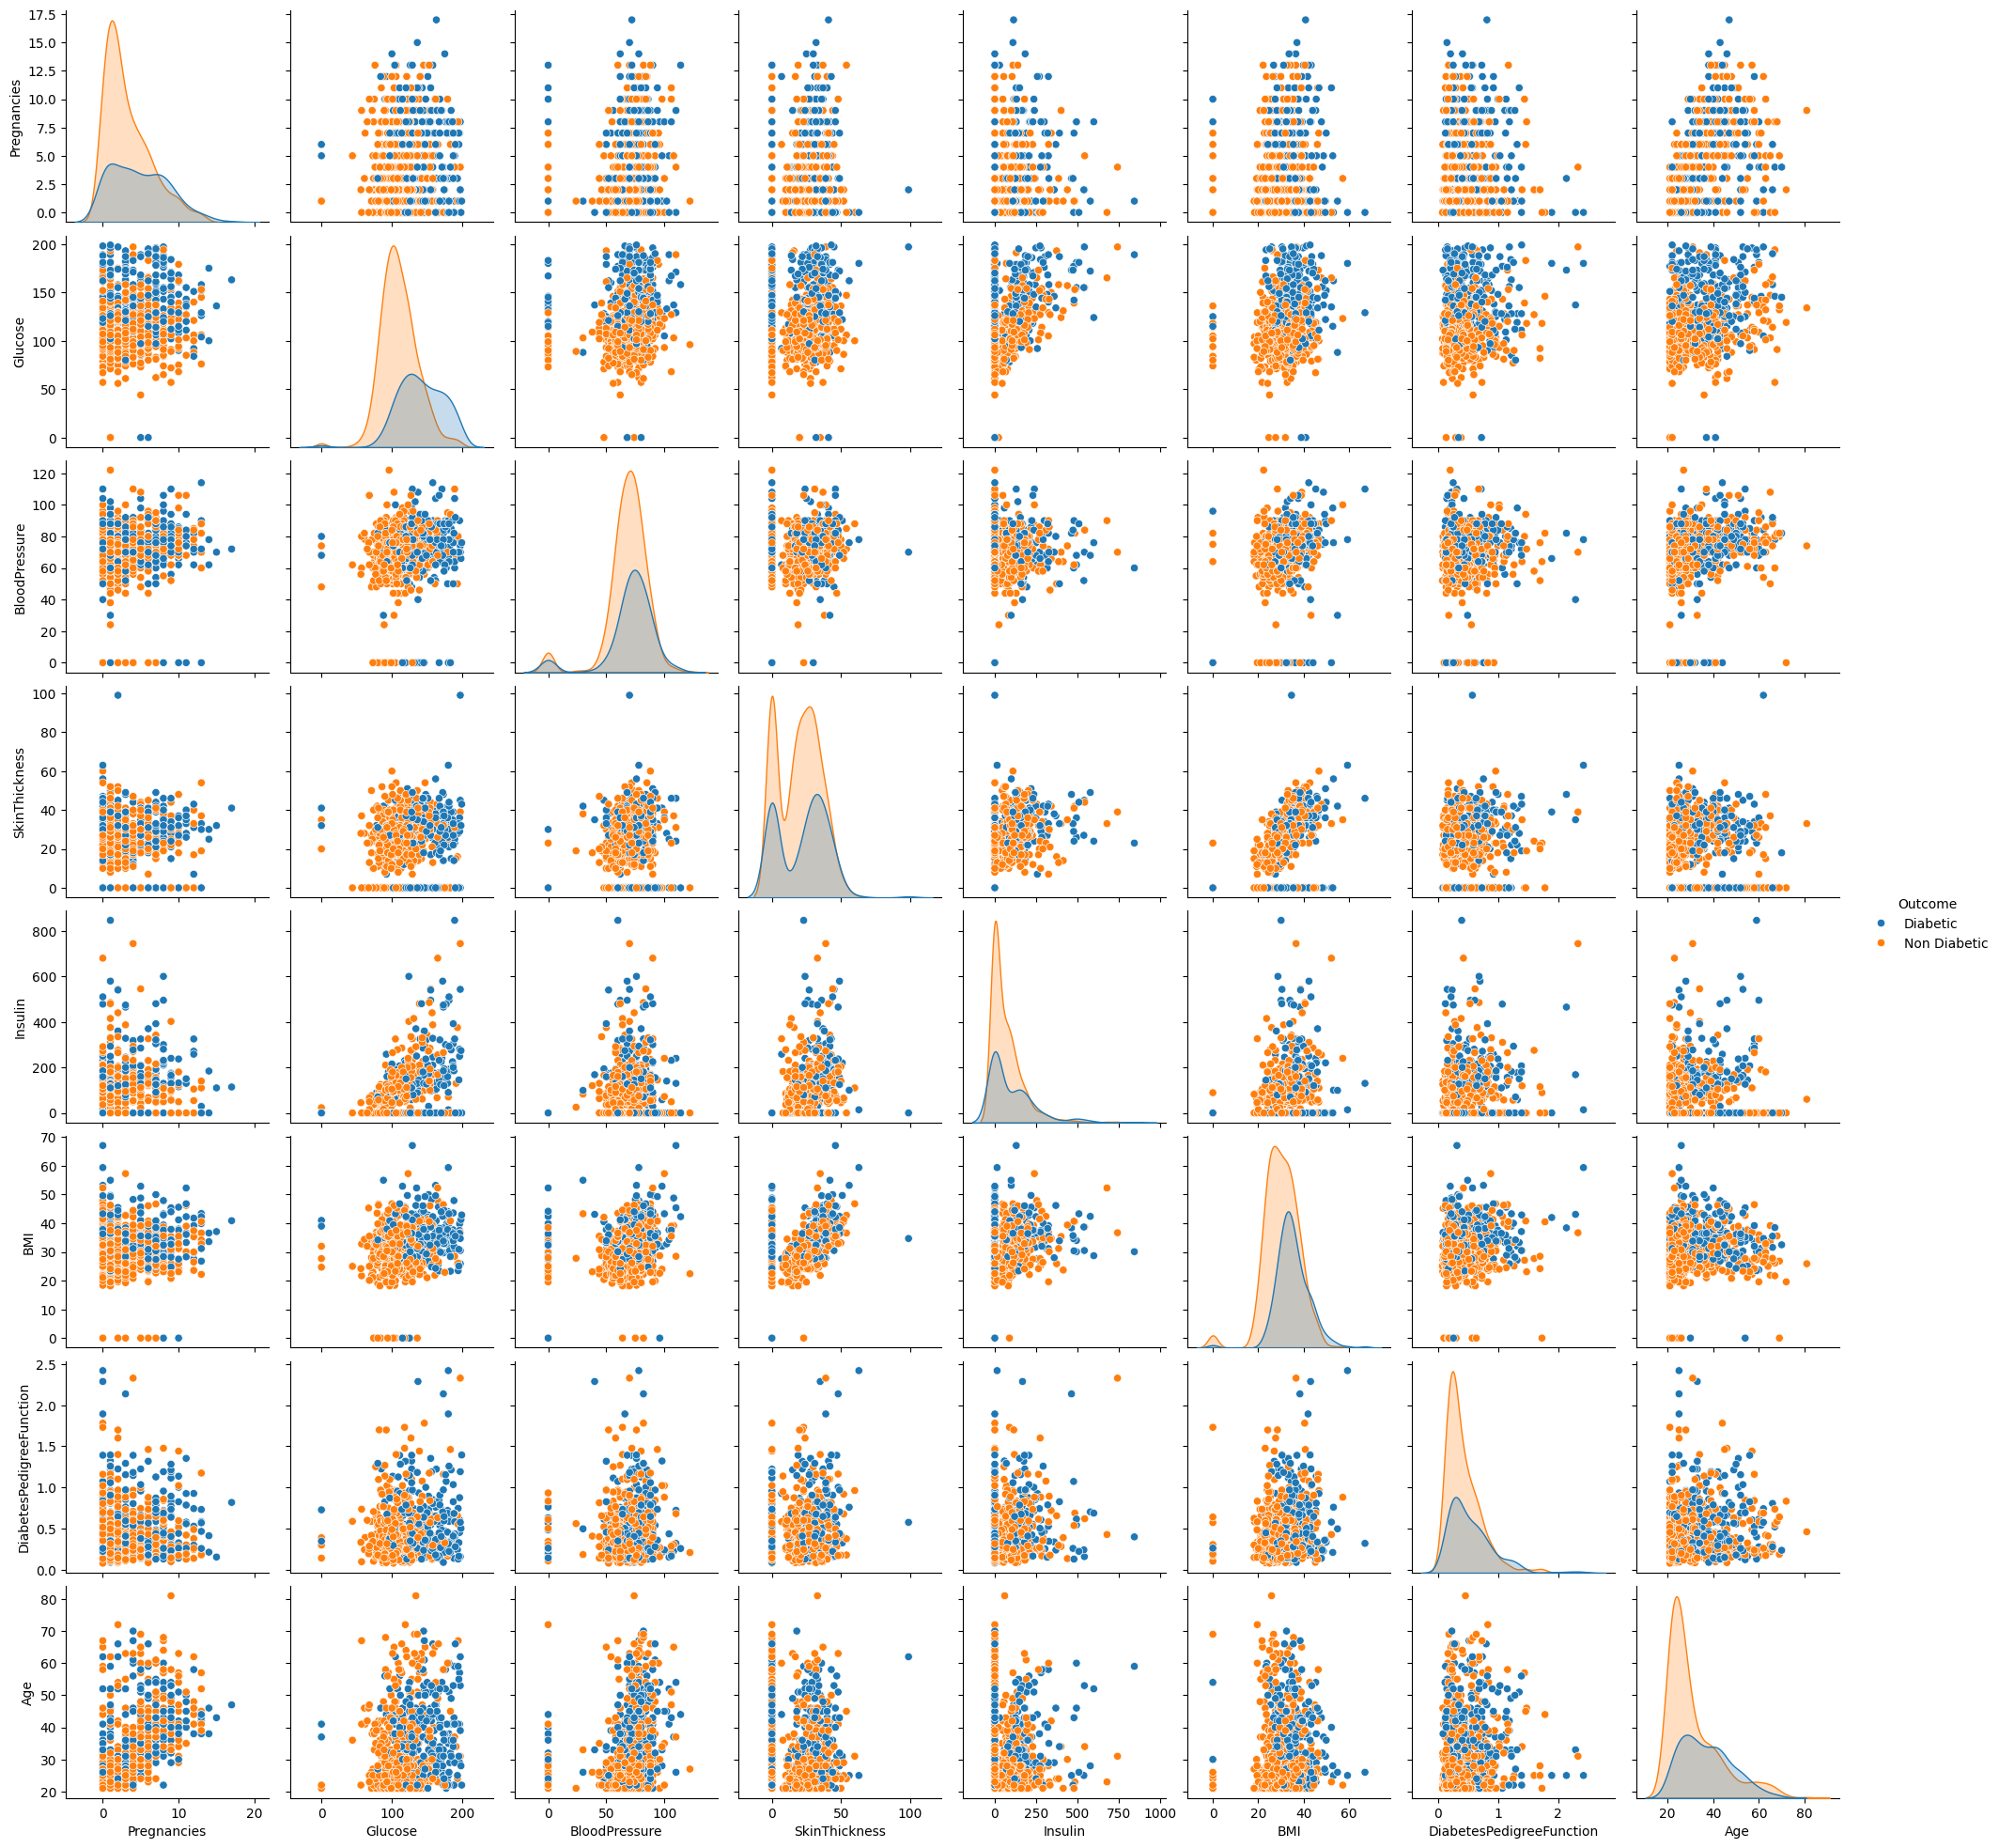

In [13]:
sns.pairplot(df, hue='Outcome')

In [15]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [16]:
X = df.drop("Outcome", axis=1).values
y = df['Outcome'].values

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=.2, random_state=0)


In [19]:
import torch
import torch.nn as nn
import torch.nn.functional as F


In [22]:
##### Creating Tensors
X_train=torch.FloatTensor(X_train)
X_test=torch.FloatTensor(X_test)
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)

In [23]:
# since the data has 8 input features plus 1 output columns which has 2 values 
# so dense output layer will have 2 neuron
# first input layer should have 8 neurons
df.shape

(768, 9)

In [24]:
#### Creating Modelwith Pytorch

class ANN_Model(nn.Module):
    def __init__(self,input_features=8,hidden1=20,hidden2=20,out_features=2):
        super().__init__()
        self.f_connected1=nn.Linear(input_features,hidden1)
        self.f_connected2=nn.Linear(hidden1,hidden2)
        self.out=nn.Linear(hidden2,out_features)
    def forward(self,x):
        x=F.relu(self.f_connected1(x))
        x=F.relu(self.f_connected2(x))
        x=self.out(x)
        return x

In [25]:
####instantiate my ANN_model
torch.manual_seed(20)
model=ANN_Model()

In [26]:
model.parameters

<bound method Module.parameters of ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)>

In [27]:
##Backward Propogation-- Define the loss_function,define the optimizer
loss_function=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

In [28]:
epochs=500
final_losses=[]
for i in range(epochs):
    i=i+1
    y_pred=model.forward(X_train)
    loss=loss_function(y_pred,y_train)
    final_losses.append(loss)
    if i%10==1:
        print("Epoch number: {} and the loss : {}".format(i,loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


Epoch number: 1 and the loss : 3.4572105407714844
Epoch number: 11 and the loss : 0.8019207119941711
Epoch number: 21 and the loss : 0.6090322136878967
Epoch number: 31 and the loss : 0.5917770862579346
Epoch number: 41 and the loss : 0.5679708123207092
Epoch number: 51 and the loss : 0.5529041886329651
Epoch number: 61 and the loss : 0.5410094857215881
Epoch number: 71 and the loss : 0.5310389995574951
Epoch number: 81 and the loss : 0.5220361351966858
Epoch number: 91 and the loss : 0.5135971903800964
Epoch number: 101 and the loss : 0.5061254501342773
Epoch number: 111 and the loss : 0.498340904712677
Epoch number: 121 and the loss : 0.4960551857948303
Epoch number: 131 and the loss : 0.48286372423171997
Epoch number: 141 and the loss : 0.47560352087020874
Epoch number: 151 and the loss : 0.4799225628376007
Epoch number: 161 and the loss : 0.47931116819381714
Epoch number: 171 and the loss : 0.46500328183174133
Epoch number: 181 and the loss : 0.4582158625125885
Epoch number: 191 an

In [29]:
### plot the loss function
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 0, 'Epoch')

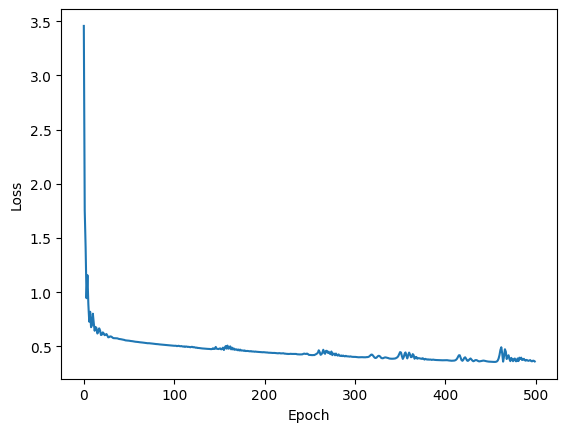

In [34]:
losses= [ loss.detach().numpy() for loss in final_losses]

plt.plot(range(epochs),losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [37]:
#### Prediction In X_test data
predictions=[]
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_pred=model(data)
        predictions.append(y_pred.argmax().item())
        print("RAW PRED ::", y_pred,"---------------", "SIMPLIFIED PRED ::",y_pred.argmax().item())

RAW PRED :: tensor([2.3347, 4.5393]) --------------- SIMPLIFIED PRED :: 1
RAW PRED :: tensor([ 2.1959, -0.9297]) --------------- SIMPLIFIED PRED :: 0
RAW PRED :: tensor([ 3.5715, -0.1529]) --------------- SIMPLIFIED PRED :: 0
RAW PRED :: tensor([0.1581, 1.1931]) --------------- SIMPLIFIED PRED :: 1
RAW PRED :: tensor([2.2280, 1.5752]) --------------- SIMPLIFIED PRED :: 0
RAW PRED :: tensor([ 3.7064, -1.5825]) --------------- SIMPLIFIED PRED :: 0
RAW PRED :: tensor([-0.8963,  1.3017]) --------------- SIMPLIFIED PRED :: 1
RAW PRED :: tensor([-0.2421,  1.8625]) --------------- SIMPLIFIED PRED :: 1
RAW PRED :: tensor([-0.2742, -0.6111]) --------------- SIMPLIFIED PRED :: 0
RAW PRED :: tensor([ 0.8391, -1.2899]) --------------- SIMPLIFIED PRED :: 0
RAW PRED :: tensor([-0.4916,  0.8640]) --------------- SIMPLIFIED PRED :: 1
RAW PRED :: tensor([-1.1252,  2.1327]) --------------- SIMPLIFIED PRED :: 1
RAW PRED :: tensor([2.4134, 1.0999]) --------------- SIMPLIFIED PRED :: 0
RAW PRED :: tensor([

In [38]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predictions)
cm

array([[84, 23],
       [14, 33]])

Text(95.72222222222221, 0.5, 'Predicted Values')

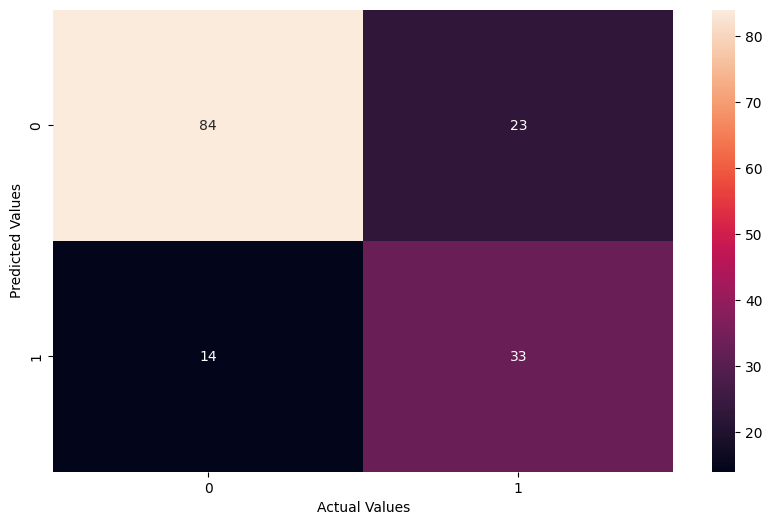

In [39]:
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [40]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,predictions)
score

0.7597402597402597

In [41]:
#### Save the model
torch.save(model,'diabetes.pt')

In [42]:
#### Save And Load the model
model=torch.load('diabetes.pt')


In [43]:
model.eval()

ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)

In [44]:
### Predcition of new data point
list(df.iloc[0,:-1])

[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0]

In [45]:
#### New Data
lst1=[6.0, 130.0, 72.0, 40.0, 0.0, 25.6, 0.627, 45.0]

In [46]:
new_data=torch.tensor(lst1)


In [47]:
#### Predict new data using Pytorch
with torch.no_grad():
    print(model(new_data))
    print(model(new_data).argmax().item())

tensor([0.9757, 1.3686])
1
